In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew
from scipy.stats.mstats import normaltest

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Data Dictionary


*   Store ID : (Index) ID of the particular store.
*   Store_Area : Physical Area of the store in yard square.
*   Items_Available : Number of different items available in the corresponding store.
*   Daily_Customer_Count : Number of customers who visited to stores on an average over month.
*   Store_Sales : Sales in (US $) that stores made.




# Importing Data









In [2]:
data_url = "https://raw.githubusercontent.com/Anubhav-Goyal01/Hacktoberfest2022/main/Data/Stores.csv"
data = pd.read_csv(data_url)
data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [3]:
data.shape

(896, 5)

In [4]:
data.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


I will drop the Store ID column because it won't be any useful in our analysis

In [5]:
data = data.drop(['Store ID '], axis= 1)

# Checking for missing values

In [6]:
data.isnull().sum()


Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

No missing values.

In [7]:
data.columns


Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales'], dtype='object')

# EDA

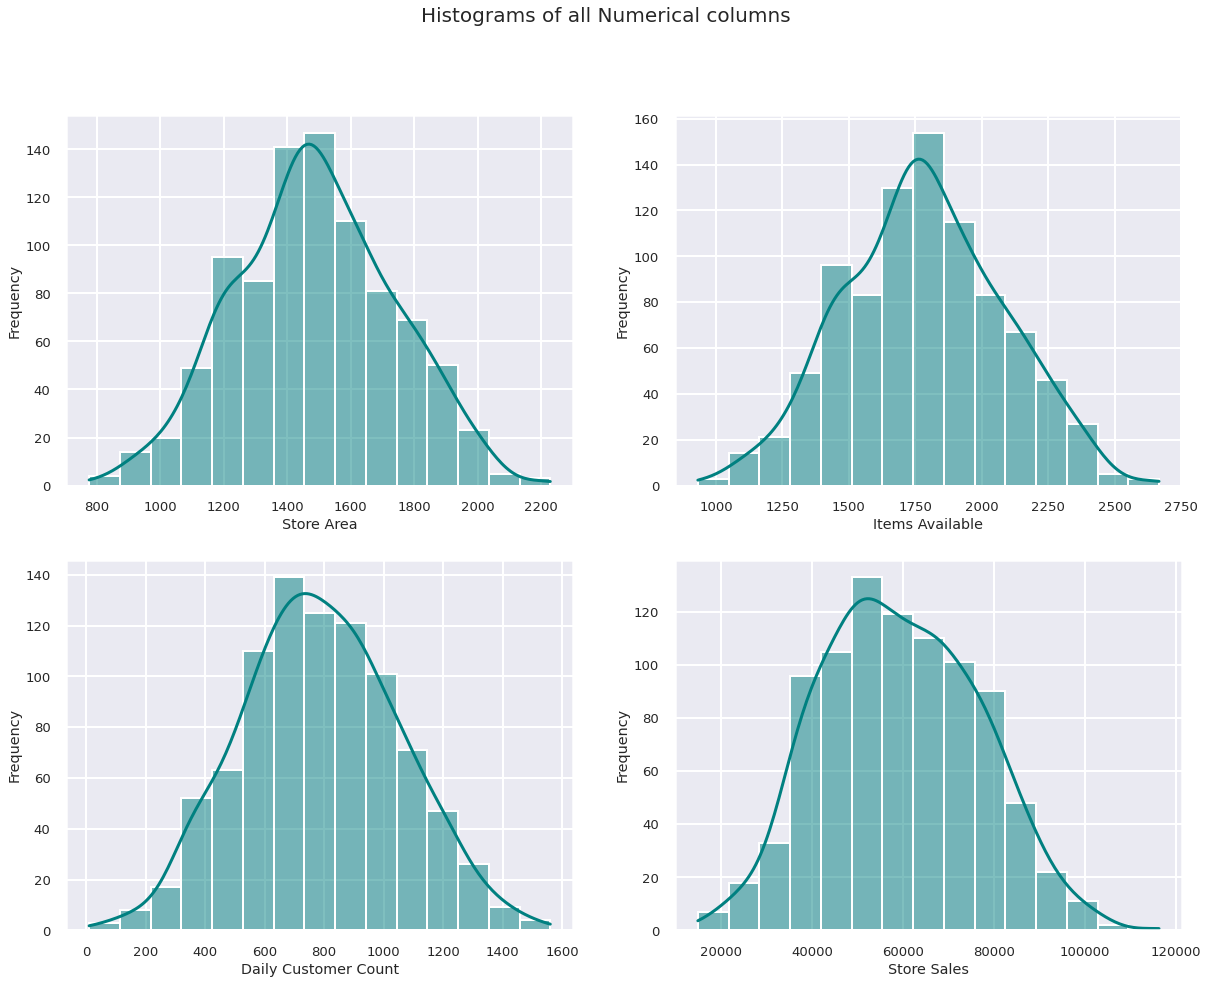

In [8]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(2, 2, figsize= (20, 15))

plt.suptitle('Histograms of all Numerical columns', fontsize = 20)

ax1 = sns.histplot(x = data['Store_Area'], color= 'teal', ax= ax[0, 0], bins= 15, kde= True)
ax1.set(xlabel= 'Store Area', ylabel= 'Frequency')

ax2 = sns.histplot(x = data['Items_Available'], color= 'teal', ax= ax[0, 1], bins= 15, kde= True)
ax2.set(xlabel= 'Items Available', ylabel= 'Frequency')

ax3 = sns.histplot(x = data['Daily_Customer_Count'], color= 'teal', ax= ax[1, 0], bins= 15, kde= True)
ax3.set(xlabel= 'Daily Customer Count', ylabel= 'Frequency')

ax4 = sns.histplot(x = data['Store_Sales'], color= 'teal', ax= ax[1, 1], bins= 15, kde= True)
ax4.set(xlabel= 'Store Sales', ylabel= 'Frequency')

plt.show()

All of our features and our target variable seems to be following a normal distribution. Let us confirm that by checking the skewness of all of them

In [9]:
skew_df = pd.DataFrame(data= data.columns, columns= ['Features'])
skew_df['Skew'] = skew_df['Features'].apply(lambda feature: skew(data[feature]))
skew_df['Abs Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Abs Skew'].apply(lambda x: True if x > 0.5 else False)
skew_df

,Features,Skew,Abs Skew,Skewed
0,Store_Area,0.030316,0.030316,False
1,Items_Available,0.034382,0.034382,False
2,Daily_Customer_Count,0.074508,0.074508,False
3,Store_Sales,0.148544,0.148544,False


None of our features and target is skewed, therefore we don't need to apply any kind of transformation

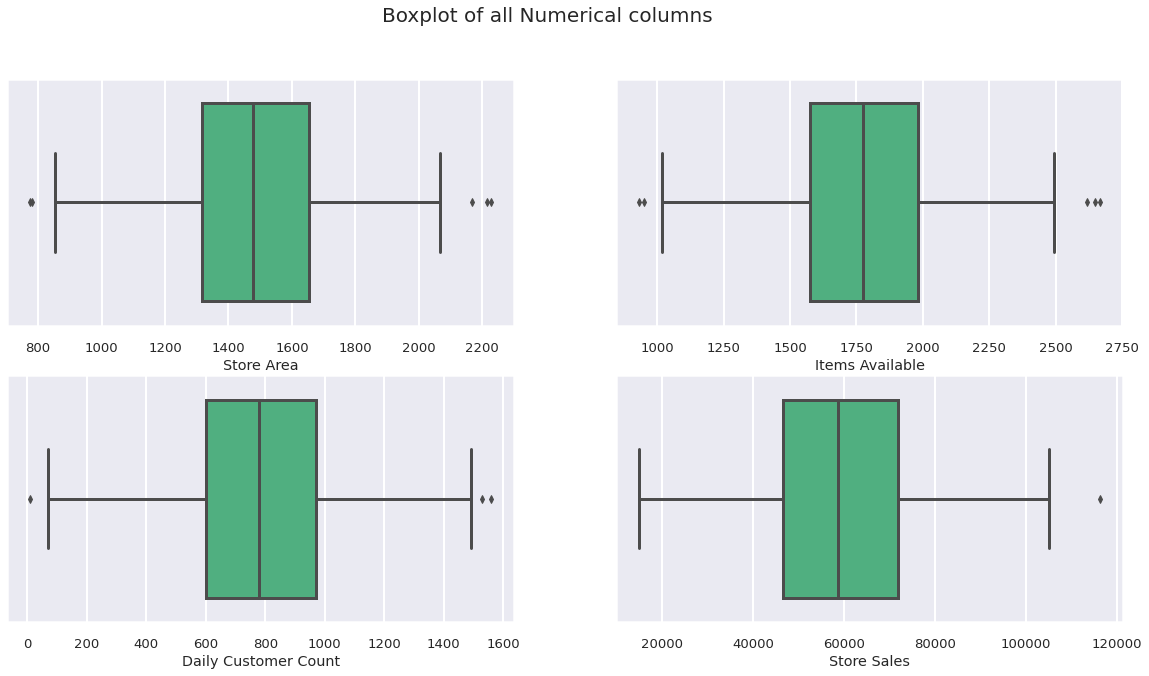

In [10]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(2, 2, figsize= (20, 10))

plt.suptitle('Boxplot of all Numerical columns', fontsize = 20)

ax1 = sns.boxplot(x = data['Store_Area'], color= '#40bf80', ax= ax[0, 0])
ax1.set(xlabel= 'Store Area')

ax2 = sns.boxplot(x = data['Items_Available'], color= '#40bf80', ax= ax[0, 1])
ax2.set(xlabel= 'Items Available')

ax3 = sns.boxplot(x = data['Daily_Customer_Count'], color= '#40bf80', ax= ax[1, 0])
ax3.set(xlabel= 'Daily Customer Count')

ax4 = sns.boxplot(x = data['Store_Sales'], color= '#40bf80', ax= ax[1, 1])
ax4.set(xlabel= 'Store Sales')

plt.show()

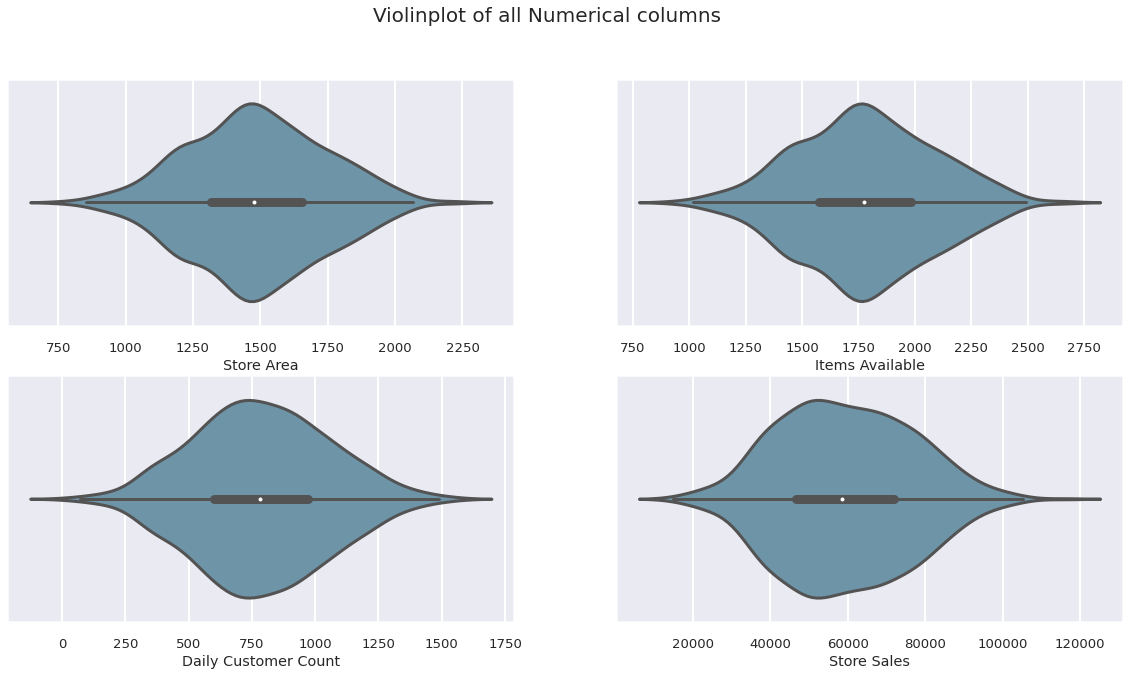

In [11]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(2, 2, figsize= (20, 10))

plt.suptitle('Violinplot of all Numerical columns', fontsize = 20)

ax1 = sns.violinplot(x = data['Store_Area'], color= '#6497b1', ax= ax[0, 0])
ax1.set(xlabel= 'Store Area')

ax2 = sns.violinplot(x = data['Items_Available'], color= '#6497b1', ax= ax[0, 1])
ax2.set(xlabel= 'Items Available')

ax3 = sns.violinplot(x = data['Daily_Customer_Count'], color= '#6497b1', ax= ax[1, 0])
ax3.set(xlabel= 'Daily Customer Count')

ax4 = sns.violinplot(x = data['Store_Sales'], color= '#6497b1', ax= ax[1, 1])
ax4.set(xlabel= 'Store Sales')

plt.show()

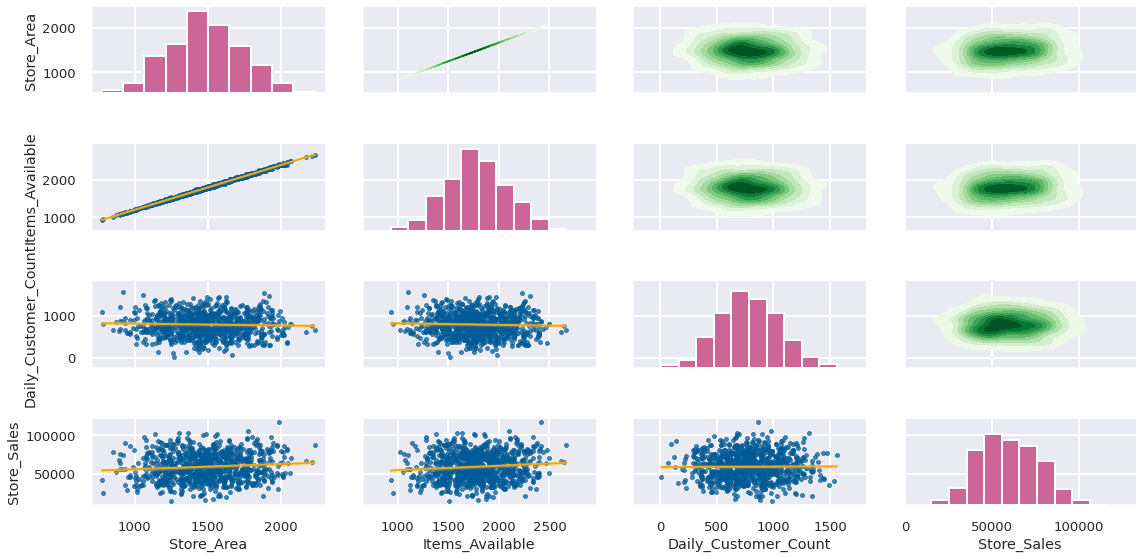

In [12]:
grid = sns.PairGrid(data, vars=['Store_Area', 'Items_Available', 'Daily_Customer_Count','Store_Sales'],
                    height=2, aspect = 2)

grid = grid.map_diag(plt.hist, color = '#cc6699')
grid = grid.map_lower(sns.regplot, scatter_kws = {'s': 15, 'alpha': 0.7, 'color': '#005b96'}, 
                      line_kws = {'color':'orange', 'linewidth': 2})
grid = grid.map_upper(sns.kdeplot, n_levels = 10, cmap= 'Greens', shade = True)

plt.show()

We can see that all of the pairs of different features in our dataset have a high concentration at the centre

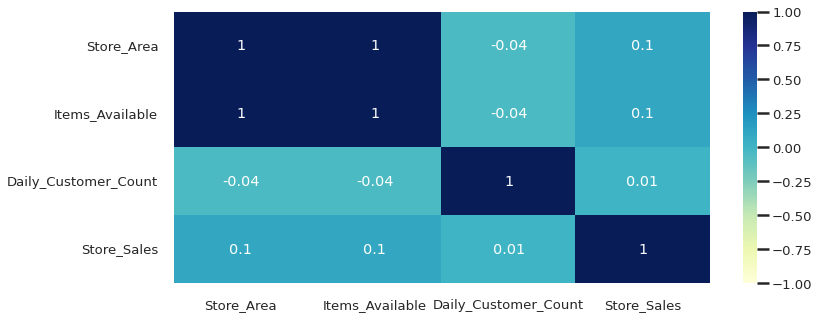

In [13]:
plt.figure(figsize= (12, 5))
sns.heatmap(data.corr().round(2), annot= True, cmap= 'YlGnBu', vmin= -1);

Correlation value between Store_Area and Items_Available is 1, it means that they are having a perfect linear relationship. Therefore, it will be a good idea to drop one of them

In [14]:
data = data.drop(['Items_Available'], axis=1)


# Cluster  Analysis

In [15]:
data_clustering = data.drop(['Daily_Customer_Count'], axis= 1).values


In [16]:
data_clustering


array([[ 1659, 66490],
       [ 1461, 39820],
       [ 1340, 54010],
       ...,
       [ 1200, 76440],
       [ 1299, 96610],
       [ 1174, 54340]])

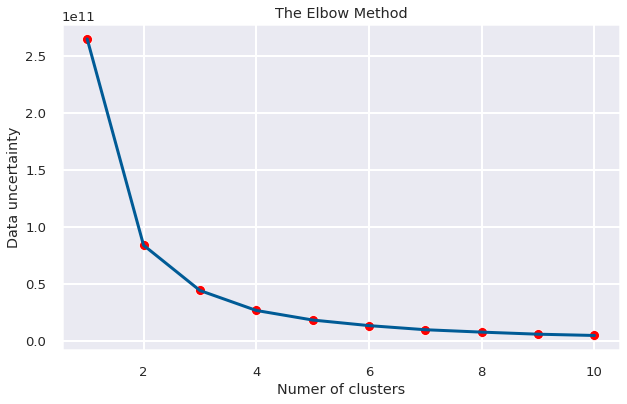

In [17]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(data_clustering)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
sns.scatterplot(x = range(1, 11), y = wcss, s= 100, color = 'red')
sns.lineplot(x = range(1,11), y = wcss, linewidth = 3, color = '#005b96')
plt.title('The Elbow Method')
plt.xlabel('Numer of clusters')
plt.ylabel('Data uncertainty')
plt.show()

It seems like 3 will be the optimum number of clusters

In [19]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(data_clustering)

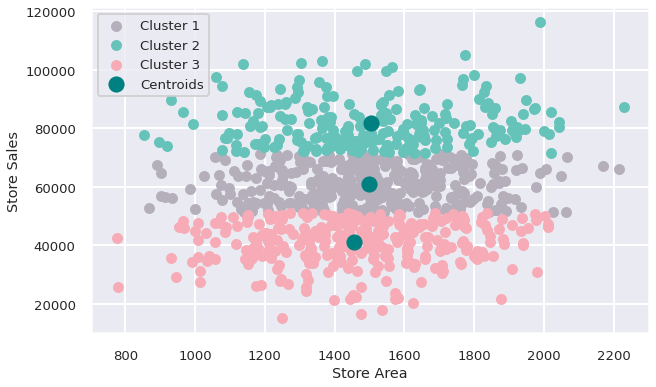

In [20]:
sns.set_context('poster', font_scale= 0.6)
plt.figure(figsize= (10, 6))
plt.scatter(
    x = data_clustering[y_kmeans == 0, 0],
    y = data_clustering[y_kmeans == 0, 1], 
    s = 80, c = '#b5afbc', label = 'Cluster 1'
)
plt.scatter(
    x = data_clustering[y_kmeans == 1, 0], 
    y = data_clustering[y_kmeans == 1, 1],
    s = 80, c = '#65c3ba', label = 'Cluster 2'
)
plt.scatter(
    x = data_clustering[y_kmeans == 2, 0], 
    y = data_clustering[y_kmeans == 2, 1], 
    s = 80, c = '#f6abb6', label = 'Cluster 3'
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    s = 200, c = 'teal', label = 'Centroids'
)

plt.xlabel('Store Area')
plt.ylabel('Store Sales')
plt.legend()
plt.show()

# Hierarchical Clustering

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

def draw_dendogram(linkage_type,name):
    single_=linkage(data_clustering,linkage_type)
    labelList = range(len(data_clustering))

    plt.figure(figsize=(15, 8))
    plt.title(name,fontsize=20)
    dendrogram(single_,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
    plt.show()

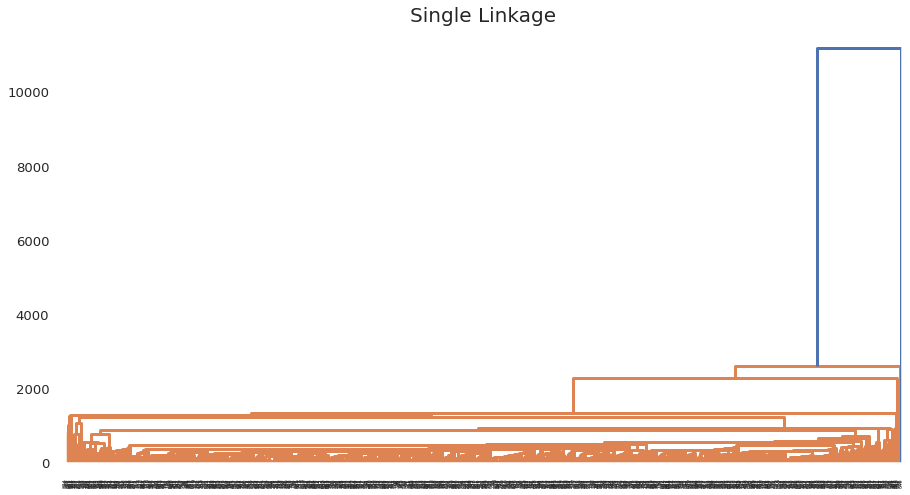

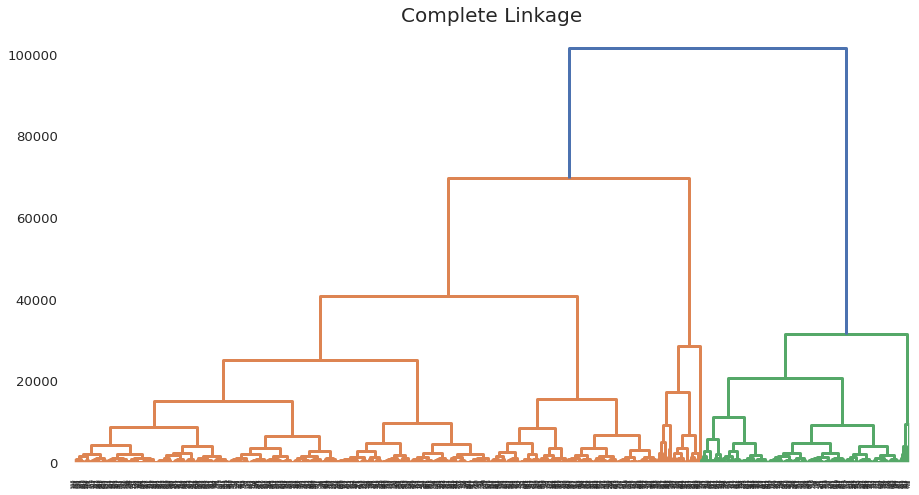

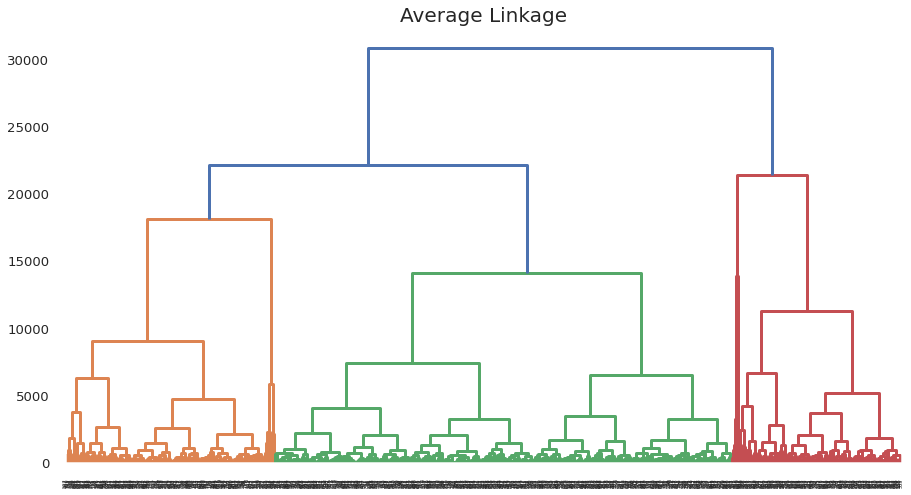

In [26]:
names=['Single Linkage','Complete Linkage','Average Linkage']
linkage_type=['single','complete','average']


for i,j in zip(linkage_type,names):
    draw_dendogram(i,j)

# Inference 


*   Single Linkage : 2 clusters
*   Complete Linkage : 3 clusters
*   Average Linkage : 4 clusters

